In [1]:
import pandas as pd
df = pd.read_csv('DatasetSaham.csv')
df  

,Date,Open
0,2022-06-15,6850.0
1,2022-06-16,6800.0
2,2022-06-17,6700.0
3,2022-06-18,6700.0
4,2022-06-19,6700.0
...,...,...
361,2023-06-11,7325.0
362,2023-06-12,7450.0
363,2023-06-13,7475.0
364,2023-06-14,7475.0


In [2]:
import joblib
data = df['Open']
n = len(data)
sizeTrain = (round(n*0.8))
data_train = pd.DataFrame(data[:sizeTrain])
data_test = pd.DataFrame(data[sizeTrain:])
data_train


,Open
0,6850.0
1,6800.0
2,6700.0
3,6700.0
4,6700.0
...,...
288,6400.0
289,6400.0
290,6400.0
291,6400.0


In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(data_train)

# Mengaplikasikan MinMaxScaler pada data pengujian
test_scaled = scaler.transform(data_test)

# reshaped_data = data.reshape(-1, 1)
train = pd.DataFrame(train_scaled, columns = ['data'])
train = train['data']

test = pd.DataFrame(test_scaled, columns = ['data'])
test = test['data']
joblib.dump(scaler, 'scalerUAS.pkl')
test

0     0.125000
1     0.291667
2     0.229167
3     0.229167
4     0.229167
        ...   
68    1.083333
69    1.187500
70    1.208333
71    1.208333
72    1.187500
Name: data, Length: 73, dtype: float64

In [4]:
import numpy as np
from numpy import array
def split_sequence(sequence, n_steps):
  X, y = list(), list()
  for i in range(len(sequence)):
    # find the end of this pattern
    end_ix = i + n_steps
    # check if we are beyond the sequence
    if end_ix > len(sequence)-1:
      break
    # gather input and output parts of the pattern
    seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
    X.append(seq_x)
    y.append(seq_y)
  
  return array(X), array(y)
df_X, df_Y = split_sequence(train, 2)
x = pd.DataFrame(df_X)
y = pd.DataFrame(df_Y)
dataset_train = pd.concat([x, y], axis=1)
dataset_train
# dataset_train.to_excel('data-train.xlsx', index=False)
X_train = dataset_train.iloc[:, :2].values
Y_train = dataset_train.iloc[:, -1].values
test_x, test_y = split_sequence(test, 2)
x = pd.DataFrame(test_x)
y = pd.DataFrame(test_y)
dataset_test = pd.concat([x, y], axis=1)
dataset_test.to_csv('data-test-UAS.csv', index=False)
X_test = dataset_test.iloc[:, :2].values
Y_test = dataset_test.iloc[:, -1].values
dataset_test

,0,1,0
0,0.125000,0.291667,0.229167
1,0.291667,0.229167,0.229167
2,0.229167,0.229167,0.229167
3,0.229167,0.229167,0.229167
4,0.229167,0.229167,0.208333
...,...,...,...
66,1.083333,1.083333,1.083333
67,1.083333,1.083333,1.187500
68,1.083333,1.187500,1.208333
69,1.187500,1.208333,1.208333


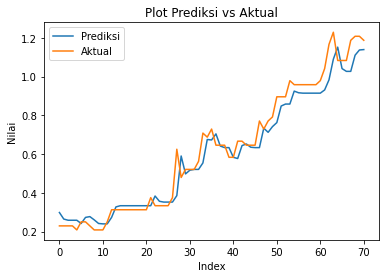

0.09183745358062938


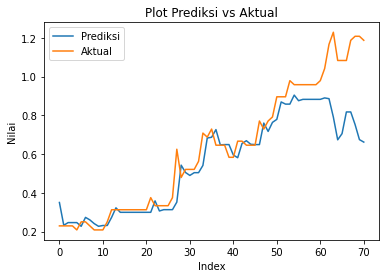

0.1550622849643631


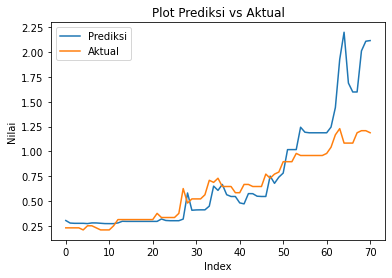

0.2027510805315201


['modelSVM.pkl']

In [6]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt

models = []
uji = ['linear','rbf','poly']
errors = []
for ker in uji:

    svr = SVR(kernel=ker) 
    svr.fit(X_train, Y_train)
    
    y_pred=svr.predict(X_test)
    error = mean_absolute_percentage_error(y_pred, Y_test)
    models.append(svr)
    errors.append(error)
    
    plt.plot(y_pred, label='Prediksi')
    plt.plot(Y_test, label='Aktual')
    plt.xlabel('Index')
    plt.ylabel('Nilai')
    plt.title('Plot Prediksi vs Aktual')
    plt.legend()
    plt.show()

    print(error)
indexModel = np.argmin(errors)
joblib.dump(models[indexModel], 'modelSVM.pkl')